In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn streamlit

     ---------------------------------------- 8.3/8.3 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 8.9/8.9 MB 4.4 MB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     -------------------------------------- 164.8/164.8 kB 5.0 MB/s eta 0:00:00
  Using cached importlib_metadata-6.6.0-py3-none-any.whl (22 kB)
     -------------------------------------- 238.7/238.7 kB 4.9 MB/s eta 0:00:00
  Using cached blinker-1.6.2-py3-none-any.whl (13 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached typing_extensions-4.6.2-py3-none-any.whl (31 kB)
  Using cached tzlocal-5.0.1-py3-none-any.whl (20 kB)
     ---------------------------------------- 21.5/21.5 MB 3.8 MB/s eta 0:00:00
     ------------------------------------

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
df = pd.read_csv('diabetes.csv')

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<AxesSubplot:>

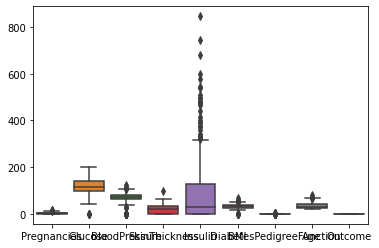

In [4]:
# Check for missing values
print(df.isnull().sum())

# Check for outliers
import seaborn as sns
sns.boxplot(data=df)

In [5]:
# Handling missing values
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)

# Handling outliers
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

# Transforming data
df['Age'] = df['Age'].apply(lambda x: 1 if x > 30 else 0)

c:\Users\Yqssine\Downloads\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


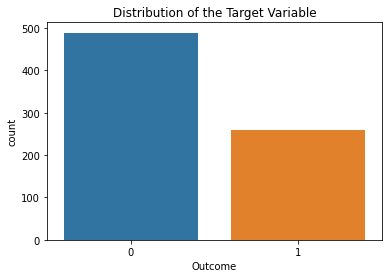

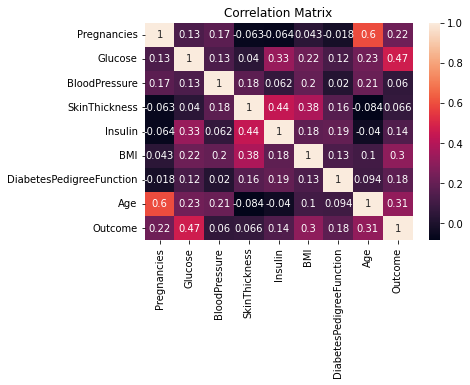

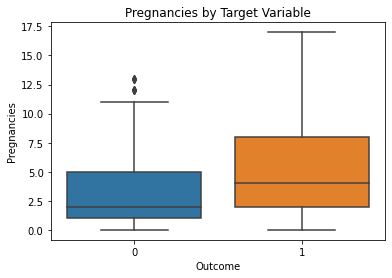

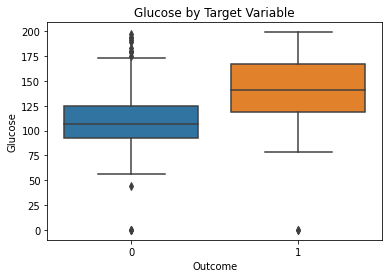

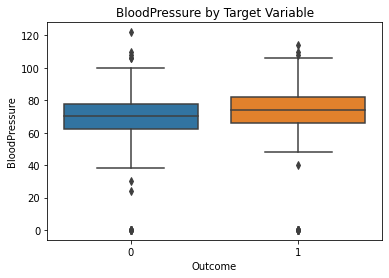

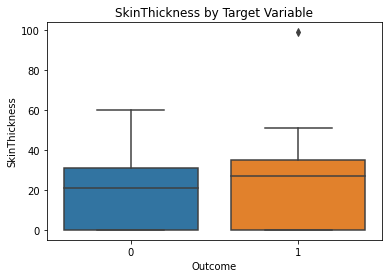

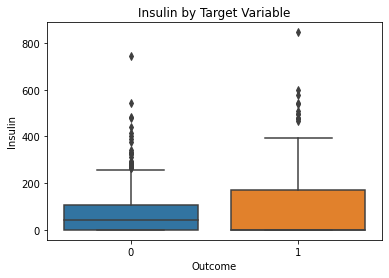

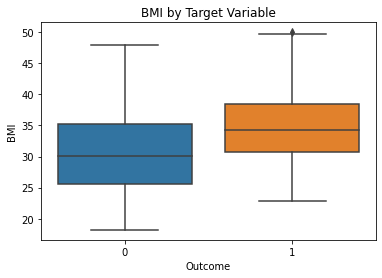

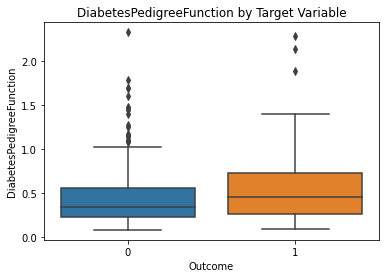

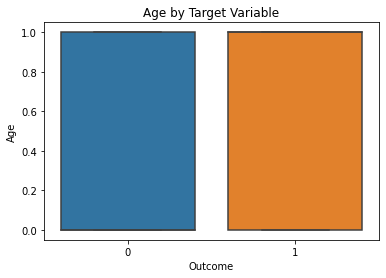

In [6]:
#Performing EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
sns.countplot(df['Outcome'])
plt.title('Distribution of the Target Variable')
plt.show()

# Correlation matrix
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

# Distribution of features by target variable
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in features:
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} by Target Variable')
    plt.show()

In [7]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Feature selection
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

In [8]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Building the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8133333333333334
Precision: 0.7368421052631579
Recall: 0.6086956521739131
F1 Score: 0.6666666666666666
